# A Real Dataset

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |


In [44]:
# import libraries and CONSTANTS
from zipfile import ZipFile
import os
import urllib
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt
import nnfs

nnfs.init()

URL = "https://nnfs.io/datasets/fashion_mnist_images.zip"
FILE = "fashion_mnist_images.zip"
FOLDER = "fashion_mnist_images"

## Data preparation

### Loading the data

In [35]:
# Loading the data
if not os.path.isfile(FILE):
    print(f"Downloading {URL} and saving as {FILE}...")
    urllib.request.urlretrieve(URL, FILE)

print("Unzipping images...")
with ZipFile(FILE) as zip_images:
    zip_images.extractall(FOLDER)

print("Done!")

Unzipping images...
Done!


In [36]:
labels = os.listdir("fashion_mnist_images/train")
print(labels)

files = os.listdir("fashion_mnist_images/train/0")
print(files[:10])
print(len(files))

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']
['3975.png', '1804.png', '4968.png', '1810.png', '3961.png', '0298.png', '1186.png', '3949.png', '3791.png', '4798.png']
6000


In [37]:
np.set_printoptions(linewidth=200)

image_data = cv2.imread("fashion_mnist_images/train/7/0002.png", cv2.IMREAD_UNCHANGED)
print(image_data)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0  49 135 182 150  59   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  78 255 220 21

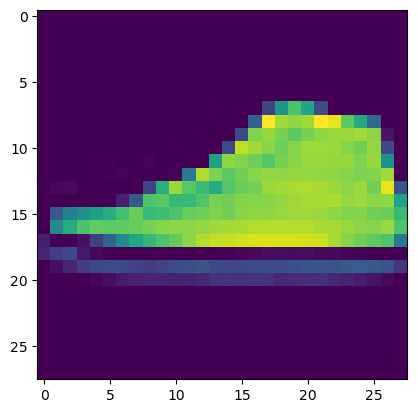

In [38]:
plt.imshow(image_data)
plt.show()

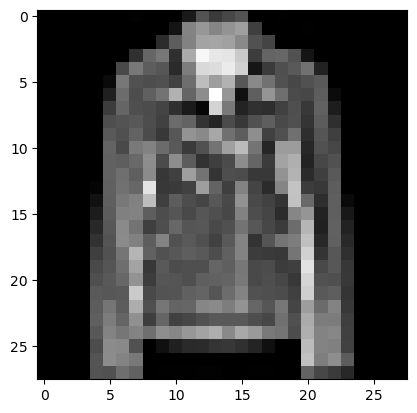

In [39]:
image_data = cv2.imread("fashion_mnist_images/train/4/0011.png", cv2.IMREAD_UNCHANGED)

plt.imshow(image_data, cmap="gray")
plt.show()

In [40]:
# Loads a MNIST dataset
def load_mnist_dataset(dataset, path):
    # Scan all the directories and create a list of labels
    labels = os.listdir(os.path.join(path, dataset))

    # Create lists for samples and labels
    X = []
    y = []

    # For each label folder
    for label in labels:
        # And for each image in given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            # Read the image
            image = cv2.imread(
                os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED
            )

            # And append it and a label to the lists
            X.append(image)
            y.append(label)

    # Convert the data to proper numpy arrays and return
    return np.array(X), np.array(y).astype("uint8")


# MNIST dataset (train + test)
def create_data_mnist(path):
    # Load both sets separately
    X, y = load_mnist_dataset("train", path)
    X_test, y_test = load_mnist_dataset("test", path)

    # And return all the data
    return X, y, X_test, y_test

# Full Code

Create Classes

In [54]:
# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(
        self,
        n_inputs,
        n_neurons,
        weight_regularizer_l1=0,
        weight_regularizer_l2=0,
        bias_regularizer_l1=0,
        bias_regularizer_l2=0,
    ):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    # Forward pass
    def forward(self, inputs, training):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases

        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# Dropout
class Layer_Dropout:
    # Init
    def __init__(self, rate):
        # Store rate, we invert it as for example for dropout
        # of 0.1 we need success rate of 0.9
        self.rate = 1 - rate

    # Forward pass
    def forward(self, inputs, training):
        # Save input values
        self.inputs = inputs

        # If not in the training mode - return values
        if not training:
            self.output = inputs.copy()
            return

        # Generate and save scaled mask
        self.binary_mask = (
            np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
        )
        # Apply mask to output values
        self.output = inputs * self.binary_mask

    # Backward pass
    def backward(self, dvalues):
        # Gradient on values
        self.dinputs = dvalues * self.binary_mask


# Input "layer"
class Layer_Input:
    # Forward pass
    def forward(self, inputs, training):
        self.output = inputs


# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs, training):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0

    # Calculate predictions for outputs
    def predictions(self, outputs):
        return outputs


# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs, training):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):
        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(
            zip(self.output, dvalues)
        ):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - np.dot(
                single_output, single_output.T
            )
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

    # Calculate predictions for outputs
    def predictions(self, outputs):
        return np.argmax(outputs, axis=1)


# Sigmoid activation
class Activation_Sigmoid:
    # Forward pass
    def forward(self, inputs, training):
        # Save input and calculate/save output
        # of the sigmoid function
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))

    # Backward pass
    def backward(self, dvalues):
        # Derivative - calculates from output of the sigmoid function
        self.dinputs = dvalues * (1 - self.output) * self.output

    # Calculate predictions for outputs
    def predictions(self, outputs):
        return (outputs > 0.5) * 1


# Linear activation
class Activation_Linear:
    # Forward pass
    def forward(self, inputs, training):
        # Just remember values
        self.inputs = inputs
        self.output = inputs

    # Backward pass
    def backward(self, dvalues):
        # derivative is 1, 1 * dvalues = dvalues - the chain rule
        self.dinputs = dvalues.copy()

    # Calculate predictions for outputs
    def predictions(self, outputs):
        return outputs


# SGD optimizer
class Optimizer_SGD:
    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1.0, decay=0.0, momentum=0.0):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (
                1.0 / (1.0 + self.decay * self.iterations)
            )

    # Update parameters
    def update_params(self, layer):
        # If we use momentum
        if self.momentum:
            # If layer does not contain momentum arrays, create them
            # filled with zeros
            if not hasattr(layer, "weight_momentums"):
                layer.weight_momentums = np.zeros_like(layer.weights)

                # If there is no momentum array for weights
                # The array doesn't exist for biases yet either.
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Build weight updates with momentum - take previous
            # updates multiplied by retain factor and update with
            # current gradients
            weight_updates = (
                self.momentum * layer.weight_momentums
                - self.current_learning_rate * layer.dweights
            )
            layer.weight_momentums = weight_updates

            # Build bias updates
            bias_updates = (
                self.momentum * layer.bias_momentums
                - self.current_learning_rate * layer.dbiases
            )
            layer.bias_momentums = bias_updates

        # Vanilla SGD updates (as before momentum update)
        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        # Update weights and biases using either
        # vanilla or momentum updates
        layer.weights += weight_updates
        layer.biases += bias_updates

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Adagrad optimizer
class Optimizer_Adagrad:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=1.0, decay=0.0, epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (
                1.0 / (1.0 + self.decay * self.iterations)
            )

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, "weight_cache"):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += (
            -self.current_learning_rate
            * layer.dweights
            / (np.sqrt(layer.weight_cache) + self.epsilon)
        )
        layer.biases += (
            -self.current_learning_rate
            * layer.dbiases
            / (np.sqrt(layer.bias_cache) + self.epsilon)
        )

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# RMSprop optimizer
class Optimizer_RMSprop:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0.0, epsilon=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (
                1.0 / (1.0 + self.decay * self.iterations)
            )

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, "weight_cache"):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache = (
            self.rho * layer.weight_cache + (1 - self.rho) * layer.dweights**2
        )
        layer.bias_cache = (
            self.rho * layer.bias_cache + (1 - self.rho) * layer.dbiases**2
        )

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += (
            -self.current_learning_rate
            * layer.dweights
            / (np.sqrt(layer.weight_cache) + self.epsilon)
        )
        layer.biases += (
            -self.current_learning_rate
            * layer.dbiases
            / (np.sqrt(layer.bias_cache) + self.epsilon)
        )

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Adam optimizer
class Optimizer_Adam:
    # Initialize optimizer - set settings
    def __init__(
        self, learning_rate=0.001, decay=0.0, epsilon=1e-7, beta_1=0.9, beta_2=0.999
    ):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (
                1.0 / (1.0 + self.decay * self.iterations)
            )

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, "weight_cache"):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum  with current gradients
        layer.weight_momentums = (
            self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        )
        layer.bias_momentums = (
            self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases
        )
        # Get corrected momentum
        # self.iteration is 0 at first pass
        # and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / (
            1 - self.beta_1 ** (self.iterations + 1)
        )
        bias_momentums_corrected = layer.bias_momentums / (
            1 - self.beta_1 ** (self.iterations + 1)
        )
        # Update cache with squared current gradients
        layer.weight_cache = (
            self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        )
        layer.bias_cache = (
            self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2
        )
        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / (
            1 - self.beta_2 ** (self.iterations + 1)
        )
        bias_cache_corrected = layer.bias_cache / (
            1 - self.beta_2 ** (self.iterations + 1)
        )

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += (
            -self.current_learning_rate
            * weight_momentums_corrected
            / (np.sqrt(weight_cache_corrected) + self.epsilon)
        )

        layer.biases += (
            -self.current_learning_rate
            * bias_momentums_corrected
            / (np.sqrt(bias_cache_corrected) + self.epsilon)
        )

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Common loss class
class Loss:
    # Regularization loss calculation
    def regularization_loss(self):
        # 0 by default
        regularization_loss = 0

        # Calculate regularization loss
        # iterate all trainable layers
        for layer in self.trainable_layers:
            # L1 regularization - weights
            # calculate only when factor greater than 0
            if layer.weight_regularizer_l1 > 0:
                regularization_loss += layer.weight_regularizer_l1 * np.sum(
                    np.abs(layer.weights)
                )

            # L2 regularization - weights
            if layer.weight_regularizer_l2 > 0:
                regularization_loss += layer.weight_regularizer_l2 * np.sum(
                    layer.weights * layer.weights
                )

            # L1 regularization - biases
            # calculate only when factor greater than 0
            if layer.bias_regularizer_l1 > 0:
                regularization_loss += layer.bias_regularizer_l1 * np.sum(
                    np.abs(layer.biases)
                )

            # L2 regularization - biases
            if layer.bias_regularizer_l2 > 0:
                regularization_loss += layer.bias_regularizer_l2 * np.sum(
                    layer.biases * layer.biases
                )

        return regularization_loss

    # Set/remember trainable layers
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y, *, include_regularization=False):
        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Add accumulated sum of losses and sample count
        self.accumulated_sum += np.sum(sample_losses)
        self.accumulated_count += len(sample_losses)

        # If just data loss - return it
        if not include_regularization:
            return data_loss

        # Return the data and regularization losses
        return data_loss, self.regularization_loss()

    # Calculates accumulated loss
    def calculate_accumulated(self, *, include_regularization=False):
        # Calculate mean loss
        data_loss = self.accumulated_sum / self.accumulated_count

        # If just data loss - return it
        if not include_regularization:
            return data_loss

        # Return the data and regularization losses
        return data_loss, self.regularization_loss()

    # Reset variables for accumulated loss
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Binary cross-entropy loss
class Loss_BinaryCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Calculate sample-wise loss
        sample_losses = -(
            y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped)
        )
        sample_losses = np.mean(sample_losses, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)

        # Calculate gradient
        self.dinputs = (
            -(y_true / clipped_dvalues - (1 - y_true) / (1 - clipped_dvalues)) / outputs
        )
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Mean Squared Error loss
class Loss_MeanSquaredError(Loss):  # L2 loss
    # Forward pass
    def forward(self, y_pred, y_true):
        # Calculate loss
        sample_losses = np.mean((y_true - y_pred) ** 2, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Gradient on values
        self.dinputs = -2 * (y_true - dvalues) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Mean Absolute Error loss
class Loss_MeanAbsoluteError(Loss):  # L1 loss
    def forward(self, y_pred, y_true):
        # Calculate loss
        sample_losses = np.mean(np.abs(y_true - y_pred), axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Calculate gradient
        self.dinputs = np.sign(y_true - dvalues) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Common accuracy class
class Accuracy:
    # Calculates an accuracy
    # given predictions and ground truth values
    def calculate(self, predictions, y):
        # Get comparison results
        comparisons = self.compare(predictions, y)

        # Calculate an accuracy
        accuracy = np.mean(comparisons)

        # Add accumulated sum of matching values and sample count
        self.accumulated_sum += np.sum(comparisons)
        self.accumulated_count += len(comparisons)

        # Return accuracy
        return accuracy

    # Calculates accumulated accuracy
    def calculate_accumulated(self):
        # Calculate an accuracy
        accuracy = self.accumulated_sum / self.accumulated_count

        # Return the data and regularization losses
        return accuracy

    # Reset variables for accumulated accuracy
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0


# Accuracy calculation for classification model
class Accuracy_Categorical(Accuracy):
    def __init__(self, *, binary=False):
        # Binary mode?
        self.binary = binary

    # No initialization is needed
    def init(self, y):
        pass

    # Compares predictions to the ground truth values
    def compare(self, predictions, y):
        if not self.binary and len(y.shape) == 2:
            y = np.argmax(y, axis=1)
        return predictions == y


# Accuracy calculation for regression model
class Accuracy_Regression(Accuracy):
    def __init__(self):
        # Create precision property
        self.precision = None

    # Calculates precision value
    # based on passed-in ground truth values
    def init(self, y, reinit=False):
        if self.precision is None or reinit:
            self.precision = np.std(y) / 250

    # Compares predictions to the ground truth values
    def compare(self, predictions, y):
        return np.absolute(predictions - y) < self.precision


# Model class
class Model:
    def __init__(self):
        # Create a list of network objects
        self.layers = []
        # Softmax classifier's output object
        self.softmax_classifier_output = None

    # Add objects to the model
    def add(self, layer):
        self.layers.append(layer)

    # Set loss, optimizer and accuracy
    def set(self, *, loss, optimizer, accuracy):
        self.loss = loss
        self.optimizer = optimizer
        self.accuracy = accuracy

    # Finalize the model
    def finalize(self):
        # Create and set the input layer
        self.input_layer = Layer_Input()

        # Count all the objects
        layer_count = len(self.layers)

        # Initialize a list containing trainable layers:
        self.trainable_layers = []

        # Iterate the objects
        for i in range(layer_count):
            # If it's the first layer,
            # the previous layer object is the input layer
            if i == 0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i + 1]

            # All layers except for the first and the last
            elif i < layer_count - 1:
                self.layers[i].prev = self.layers[i - 1]
                self.layers[i].next = self.layers[i + 1]

            # The last layer - the next object is the loss
            # Also let's save aside the reference to the last object
            # whose output is the model's output
            else:
                self.layers[i].prev = self.layers[i - 1]
                self.layers[i].next = self.loss
                self.output_layer_activation = self.layers[i]

            # If layer contains an attribute called "weights",
            # it's a trainable layer -
            # add it to the list of trainable layers
            # We don't need to check for biases -
            # checking for weights is enough
            if hasattr(self.layers[i], "weights"):
                self.trainable_layers.append(self.layers[i])

        # Update loss object with trainable layers
        self.loss.remember_trainable_layers(self.trainable_layers)

        # If output activation is Softmax and
        # loss function is Categorical Cross-Entropy
        # create an object of combined activation
        # and loss function containing
        # faster gradient calculation
        if isinstance(self.layers[-1], Activation_Softmax) and isinstance(
            self.loss, Loss_CategoricalCrossentropy
        ):
            # Create an object of combined activation
            # and loss functions
            self.softmax_classifier_output = (
                Activation_Softmax_Loss_CategoricalCrossentropy()
            )

    # Train the model
    def train(
        self, X, y, *, epochs=1, batch_size=None, print_every=1, validation_data=None
    ):
        # Initialize accuracy object
        self.accuracy.init(y)

        # Default value if batch size is not being set
        train_steps = 1

        # If there is validation data passed,
        # set default number of steps for validation as well
        if validation_data is not None:
            validation_steps = 1

            # For better readability
            X_val, y_val = validation_data

        # Calculate number of steps
        if batch_size is not None:
            train_steps = len(X) // batch_size
            # Dividing rounds down. If there are some remaining
            # data but not a full batch, this won't include it
            # Add `1` to include this not full batch
            if train_steps * batch_size < len(X):
                train_steps += 1

            if validation_data is not None:
                validation_steps = len(X_val) // batch_size

                # Dividing rounds down. If there are some remaining
                # data but nor full batch, this won't include it
                # Add `1` to include this not full batch
                if validation_steps * batch_size < len(X_val):
                    validation_steps += 1

        # Main training loop
        for epoch in range(1, epochs + 1):
            # Print epoch number
            print(f"epoch: {epoch}")

            # Reset accumulated values in loss and accuracy objects
            self.loss.new_pass()
            self.accuracy.new_pass()

            # Iterate over steps
            for step in range(train_steps):
                # If batch size is not set -
                # train using one step and full dataset
                if batch_size is None:
                    batch_X = X
                    batch_y = y

                # Otherwise slice a batch
                else:
                    batch_X = X[step * batch_size : (step + 1) * batch_size]
                    batch_y = y[step * batch_size : (step + 1) * batch_size]

                # Perform the forward pass
                output = self.forward(batch_X, training=True)

                # Calculate loss
                data_loss, regularization_loss = self.loss.calculate(
                    output, batch_y, include_regularization=True
                )
                loss = data_loss + regularization_loss

                # Get predictions and calculate an accuracy
                predictions = self.output_layer_activation.predictions(output)
                accuracy = self.accuracy.calculate(predictions, batch_y)

                # Perform backward pass
                self.backward(output, batch_y)

                # Optimize (update parameters)
                self.optimizer.pre_update_params()
                for layer in self.trainable_layers:
                    self.optimizer.update_params(layer)
                self.optimizer.post_update_params()

                # Print a summary
                if not step % print_every or step == train_steps - 1:
                    print(
                        f"step: {step}, "
                        + f"acc: {accuracy:.3f}, "
                        + f"loss: {loss:.3f} ("
                        + f"data_loss: {data_loss:.3f}, "
                        + f"reg_loss: {regularization_loss:.3f}), "
                        + f"lr: {self.optimizer.current_learning_rate}"
                    )

            # Get and print epoch loss and accuracy
            (
                epoch_data_loss,
                epoch_regularization_loss,
            ) = self.loss.calculate_accumulated(include_regularization=True)
            epoch_loss = epoch_data_loss + epoch_regularization_loss
            epoch_accuracy = self.accuracy.calculate_accumulated()

            print(
                f"training, "
                + f"acc: {epoch_accuracy:.3f}, "
                + f"loss: {epoch_loss:.3f} ("
                + f"data_loss: {epoch_data_loss:.3f}, "
                + f"reg_loss: {epoch_regularization_loss:.3f}), "
                + f"lr: {self.optimizer.current_learning_rate}"
            )

            # If there is the validation data
            if validation_data is not None:
                # Reset accumulated values in loss
                # and accuracy objects
                self.loss.new_pass()
                self.accuracy.new_pass()

                # Iterate over steps
                for step in range(validation_steps):
                    # If batch size is not set -
                    # train using one step and full dataset
                    if batch_size is None:
                        batch_X = X_val
                        batch_y = y_val

                    # Otherwise slice a batch
                    else:
                        batch_X = X_val[step * batch_size : (step + 1) * batch_size]
                        batch_y = y_val[step * batch_size : (step + 1) * batch_size]

                    # Perform the forward pass
                    output = self.forward(batch_X, training=False)

                    # Calculate the loss
                    self.loss.calculate(output, batch_y)

                    # Get predictions and calculate an accuracy
                    predictions = self.output_layer_activation.predictions(output)
                    self.accuracy.calculate(predictions, batch_y)

                # Get and print validation loss and accuracy
                validation_loss = self.loss.calculate_accumulated()
                validation_accuracy = self.accuracy.calculate_accumulated()

                # Print a summary
                print(
                    f"validation, "
                    + f"acc: {validation_accuracy:.3f}, "
                    + f"loss: {validation_loss:.3f}"
                )

    # Performs forward pass
    def forward(self, X, training):
        # Call forward method on the input layer
        # this will set the output property that
        # the first layer in "prev" object is expecting
        self.input_layer.forward(X, training)

        # Call forward method of every object in a chain
        # Pass output of the previous object as a parameter
        for layer in self.layers:
            layer.forward(layer.prev.output, training)

        # "layer" is now the last object from the list,
        # return its output
        return layer.output

    # Performs backward pass
    def backward(self, output, y):
        # If softmax classifier
        if self.softmax_classifier_output is not None:
            # First call backward method
            # on the combined activation/loss
            # this will set dinputs property
            self.softmax_classifier_output.backward(output, y)

            # Since we'll not call backward method of the last layer
            # which is Softmax activation
            # as we used combined activation/loss
            # object, let's set dinputs in this object
            self.layers[-1].dinputs = self.softmax_classifier_output.dinputs

            # Call backward method going through
            # all the objects but last
            # in reversed order passing dinputs as a parameter
            for layer in reversed(self.layers[:-1]):
                layer.backward(layer.next.dinputs)

            return

        # First call backward method on the loss
        # this will set dinputs property that the last
        # layer will try to access shortly
        self.loss.backward(output, y)

        # Call backward method going through all the objects
        # in reversed order passing dinputs as a parameter
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)


# Loads a MNIST dataset
def load_mnist_dataset(dataset, path):
    # Scan all the directories and create a list of labels
    labels = os.listdir(os.path.join(path, dataset))

    # Create lists for samples and labels
    X = []
    y = []

    # For each label folder
    for label in labels:
        # And for each image in given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            # Read the image
            image = cv2.imread(
                os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED
            )

            # And append it and a label to the lists
            X.append(image)
            y.append(label)

    # Convert the data to proper numpy arrays and return
    return np.array(X), np.array(y).astype("uint8")


# MNIST dataset (train + test)
def create_data_mnist(path):
    # Load both sets separately
    X, y = load_mnist_dataset("train", path)
    X_test, y_test = load_mnist_dataset("test", path)

    # And return all the data
    return X, y, X_test, y_test

Create Data

In [60]:
# Create dataset
X, y, X_test, y_test = create_data_mnist("fashion_mnist_images")

# Shuffle the training dataset
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

# Scale and reshape samples
X = (X.reshape(X.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) - 127.5) / 127.5

Create Neural Network

In [61]:
# Instantiate the model
model = Model()

# Add layers
model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

# Set loss, optimizer and accuracy objects
model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(decay=1e-3),
    accuracy=Accuracy_Categorical(),
)

# Finalize the model
model.finalize()

Train the model

In [62]:
model.train(
    X, y, validation_data=(X_test, y_test), epochs=10, batch_size=128, print_every=100
)

epoch: 1
step: 0, acc: 0.102, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.750, loss: 0.649 (data_loss: 0.649, reg_loss: 0.000), lr: 0.0009090909090909091
step: 200, acc: 0.789, loss: 0.510 (data_loss: 0.510, reg_loss: 0.000), lr: 0.0008333333333333334
step: 300, acc: 0.852, loss: 0.524 (data_loss: 0.524, reg_loss: 0.000), lr: 0.0007692307692307692
step: 400, acc: 0.852, loss: 0.425 (data_loss: 0.425, reg_loss: 0.000), lr: 0.0007142857142857143
step: 468, acc: 0.812, loss: 0.547 (data_loss: 0.547, reg_loss: 0.000), lr: 0.000681198910081744
training, acc: 0.762, loss: 0.651 (data_loss: 0.651, reg_loss: 0.000), lr: 0.000681198910081744
validation, acc: 0.825, loss: 0.482
epoch: 2
step: 0, acc: 0.852, loss: 0.427 (data_loss: 0.427, reg_loss: 0.000), lr: 0.0006807351940095304
step: 100, acc: 0.836, loss: 0.435 (data_loss: 0.435, reg_loss: 0.000), lr: 0.0006373486297004461
step: 200, acc: 0.852, loss: 0.368 (data_loss: 0.368, reg_loss: 0.000), lr: 0.000599161